In [197]:
# Created By Venujan Malaiyandi
# BSCP|CS|61|101
# For Task 8.2C
# Cyber Security Analytics

In [198]:
import sys
import re
import numpy as np
import joblib
import csv
import matplotlib.pyplot as plt
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_validate 
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE



In [199]:
#minimum lenght of a dns name
MIN_LEN=10

#random state
random_state = 170
#random_state = 1

In [200]:
def load_alexa(filename):
    domain_list=[]
    csv_reader = csv.reader(open(filename))
    for row in csv_reader:
        domain=row[1]
        #print(domain)
        if len(domain) >= MIN_LEN:
            domain_list.append(domain)
    return domain_list

def domain2ver(domain):
    ver=[]
    for i in range(0,len(domain)):
        ver.append([ord(domain[i])])
    return ver


def load_dga(filename):
    domain_list=[]
    #xsxqeadsbgvpdke.co.uk,Domain used by Cryptolocker - Flashback DGA for 13 Apr 2017,2017-04-13,
    # http://osint.bambenekconsulting.com/manual/cl.txt
    with open(filename) as f:
        for line in f:
            domain=line.split(",")[0]
            if len(domain) >= MIN_LEN:
                domain_list.append(domain)
    return  domain_list


In [201]:
len(load_alexa("dga/top-100.csv"))

58

In [202]:
#load dns data
x1_domain_list = load_alexa("./dga/top-100.csv")
x2_domain_list = load_dga("./dga/dga-cryptolocke-50.txt")
x3_domain_list = load_dga("./dga/dga-post-tovar-goz-50.txt")

x_domain_list=np.concatenate((x1_domain_list, x2_domain_list,x3_domain_list))

In [203]:
x_domain_list[0:5]

array(['google.com', 'youtube.com', 'facebook.com', 'wikipedia.org',
       'reddit.com'], dtype='<U32')

In [204]:
len(x_domain_list)

158

In [205]:
y1=[0]*len(x1_domain_list)
y2=[1]*len(x2_domain_list)
y3=[1]*len(x3_domain_list)

y=np.concatenate((y1, y2,y3))


In [206]:
y[0]

0

In [207]:
#print (x_domain_list)

cv = CountVectorizer(ngram_range=(2, 2), decode_error="ignore",
                                      token_pattern=r"\w", min_df=1)
x= cv.fit_transform(x_domain_list).toarray()


In [208]:
len(x)

158

In [209]:
print(x[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [210]:
# Apply KMeans
k_means = KMeans( n_clusters = 2, random_state = random_state, n_init = 60)
y_pred = k_means.fit_predict(x)
print(sum(y_pred))


77


In [211]:
# kmeans = KMeans(n_clusters=2, random_state='auto', n_init="auto").fit(x)
#kmeans = KMeans(n_clusters=2, random_state=170, n_init=49).fit(x)
# kmeans.predict(x[0])

In [212]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [213]:
x.shape

(158, 983)

In [214]:
#y_pred = kmeans.predict(x)

In [215]:

# Print clustering accuracy
clustering_accuracy = np.mean(y_pred == y) * 100

print("Accurancy = ", clustering_accuracy)



Accurancy =  80.37974683544303


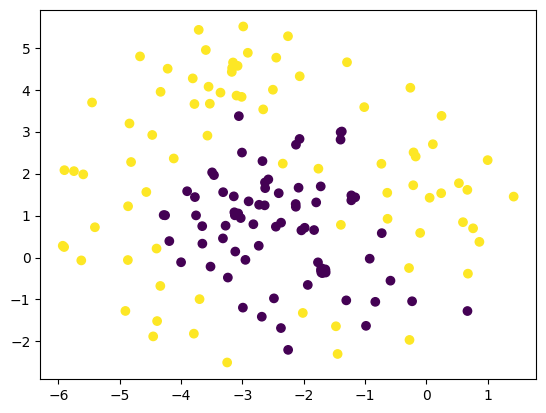

In [216]:
# Apply t-SNE for visualization on the scaled data
tsne = TSNE(n_components=2, learning_rate=100, random_state=170)
x_tsne = tsne.fit_transform(x)

# Plot the clusters and centroids
scatter = plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y_pred, cmap='viridis')
# plt.scatter(cluster_centers[0,:], cluster_centers[1,:], marker='x', s=100, linewidths=3, color='red', label='Centroids')
#plt.scatter(x_tsne[:, 0], x_tsne[:, 1])


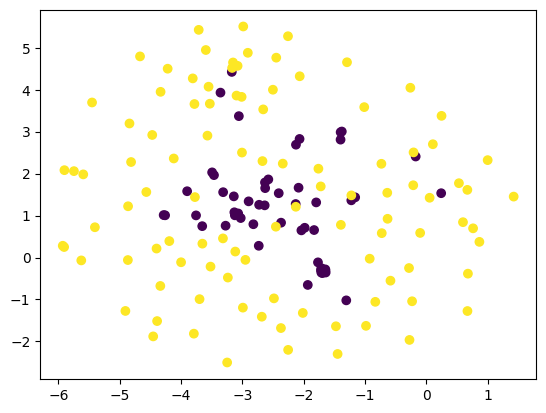

In [217]:
scatter = plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y, cmap='viridis')


In [218]:
x_tsne[0]

array([-1.7672329 , -0.11546548], dtype=float32)

In [219]:
y[0]

0

In [220]:
print("Before TSNE: ", x.shape)

Before TSNE:  (158, 983)


In [221]:
print("Accurancy: ", clustering_accuracy)

Accurancy:  80.37974683544303


In [222]:
print("After TSNE: ", x_tsne.shape)

After TSNE:  (158, 2)
